### SUPPORT VECTOR MACHINE REGRESSION

In [67]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [68]:
path = '/Users/francescavasta/Desktop/ADSEM/II YEAR I SEM/UE 2 - Machine Learning /Machine Learning - TAXI PROJECT/data_clean.csv'
df_original = pd.read_csv(path)

In [69]:
# Overview of variables and NAs
list(df_original)
df_original.info()
df_original.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       983 non-null    float64
 1   Time_of_Day            983 non-null    object 
 2   Day_of_Week            983 non-null    object 
 3   Passenger_Count        983 non-null    float64
 4   Traffic_Conditions     983 non-null    object 
 5   Weather                983 non-null    object 
 6   Base_Fare              983 non-null    float64
 7   Per_Km_Rate            983 non-null    float64
 8   Per_Minute_Rate        983 non-null    float64
 9   Trip_Duration_Minutes  983 non-null    float64
 10  Trip_Price             983 non-null    float64
 11  Trip_Distance_km_log   983 non-null    float64
 12  Trip_Price_log         983 non-null    float64
dtypes: float64(9), object(4)
memory usage: 100.0+ KB


,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Trip_Distance_km_log,Trip_Price_log
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,27.093997,2.497457,3.501745,1.242601,0.312278,64.034102,57.552115,3.069638,3.896462
std,20.176399,1.082044,0.848856,0.474686,0.250331,35.955663,41.553535,0.795551,0.583602
min,1.230000,1.000000,2.010000,0.336846,0.078955,5.010000,2.601000,0.802002,1.281212
25%,12.185000,2.000000,2.770000,0.855000,0.190000,36.420000,33.390700,2.579079,3.537786
50%,25.630000,3.000000,3.500522,1.210000,0.290000,62.170000,50.241200,3.282038,3.936544
75%,38.340000,3.000000,4.200000,1.610000,0.400000,89.640000,69.577450,3.672242,4.256710
max,146.067047,4.000000,5.000000,5.262560,4.995513,323.485000,332.043689,4.990889,5.808274


In [70]:
# Create a copy to avoid modifying the original dataframe
df_linear_model = df_original.copy()

# Drop the original non-log transformed columns
#df_linear_model = df_linear_model.drop(['Trip_Distance_km', 'Trip_Price'], axis=1)

# Drop the original log transformed columns (because the log trasformation might interfere with outliers identification)
df_linear_model = df_linear_model.drop(['Trip_Distance_km_log', 'Trip_Price_log'], axis=1)

In [71]:
# Create dummy variables for categorical columns
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

# Create dummies and drop first category for each variable
for column in categorical_columns:
    dummies = pd.get_dummies(df_linear_model[column], prefix=column, drop_first=True)
    df_linear_model = pd.concat([df_linear_model, dummies], axis=1)
    df_linear_model = df_linear_model.drop(column, axis=1)

df_linear_model.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           983 non-null    float64
 1   Passenger_Count            983 non-null    float64
 2   Base_Fare                  983 non-null    float64
 3   Per_Km_Rate                983 non-null    float64
 4   Per_Minute_Rate            983 non-null    float64
 5   Trip_Duration_Minutes      983 non-null    float64
 6   Trip_Price                 983 non-null    float64
 7   Time_of_Day_Evening        983 non-null    bool   
 8   Time_of_Day_Morning        983 non-null    bool   
 9   Time_of_Day_Night          983 non-null    bool   
 10  Day_of_Week_Weekend        983 non-null    bool   
 11  Traffic_Conditions_Low     983 non-null    bool   
 12  Traffic_Conditions_Medium  983 non-null    bool   
 13  Weather_Rain               983 non-null    bool   

In [72]:
outliers_indexes= [12,  13,  20,  33,  72, 132, 161, 179, 188, 201, 223, 231, 233, 243,
       264, 286, 292, 300, 301, 305, 324, 346, 357, 413, 430, 474, 476, 483,
       485, 522, 525, 535, 547, 565, 596, 660, 680, 690, 752, 781] #outliers found with the OLS


#remove outliers from a copy of the oroginal dataframe
df_model_cleaned = df_linear_model.copy()

# Rimuovi gli outliers dal dataset originale (o dalla sua copia)
df_model_cleaned = df_model_cleaned.drop(index=outliers_indexes)

df_model_cleaned.shape

df_model_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 982
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           943 non-null    float64
 1   Passenger_Count            943 non-null    float64
 2   Base_Fare                  943 non-null    float64
 3   Per_Km_Rate                943 non-null    float64
 4   Per_Minute_Rate            943 non-null    float64
 5   Trip_Duration_Minutes      943 non-null    float64
 6   Trip_Price                 943 non-null    float64
 7   Time_of_Day_Evening        943 non-null    bool   
 8   Time_of_Day_Morning        943 non-null    bool   
 9   Time_of_Day_Night          943 non-null    bool   
 10  Day_of_Week_Weekend        943 non-null    bool   
 11  Traffic_Conditions_Low     943 non-null    bool   
 12  Traffic_Conditions_Medium  943 non-null    bool   
 13  Weather_Rain               943 non-null    bool   
 14 

In [73]:
#Scale numerical features only (not using log)
numerical_columns = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 
                    'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']


#set the scaler 
scaler = StandardScaler()
df_model_scaled = df_linear_model.copy()
df_model_scaled[numerical_columns] = scaler.fit_transform(df_linear_model[numerical_columns])

X = df_model_scaled.drop('Trip_Price', axis=1)
y = df_model_scaled['Trip_Price']

# Transform booleans in integer for better handling
bool_columns = X.select_dtypes(include='bool').columns
X[bool_columns] = X[bool_columns].astype(int)



In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
# Train the model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)


SVR(kernel='linear')

Here are the key SVM parameters you can experiment with:

- a. Kernel Type (kernel)
'linear': Useful when the data is linearly separable.
'rbf': Radial Basis Function (default), good for non-linear relationships.
'poly': Polynomial kernel.
'sigmoid': Sigmoid kernel.
- b. Regularization Parameter (C)
Controls the trade-off between a smooth decision boundary and classifying training points correctly.
A high C value gives a smaller margin but tries to classify every training point correctly (low bias, high variance).
A low C value gives a larger margin but might misclassify some training points (high bias, low variance).
- c. Kernel Coefficient (gamma)
The 'gamma' parameter defines how much influence a single training point has. A low value makes the model smoother, while a high value allows it to fit the training data more closely.
Low gamma: The model is too simple and has high bias.
High gamma: The model overfits the training data (high variance).
- d. Epsilon (epsilon)
Defines a margin of tolerance where no penalty is given for errors. It’s used in epsilon-SVR for regression tasks.
A small epsilon leads to a model that follows the training data very closely.
- e. Degree (degree) (only for 'poly' kernel)
The degree of the polynomial kernel function. A higher degree leads to more flexibility, which can lead to overfitting.
You can perform grid search or randomized search to find the best hyperparameters

In [76]:
# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.3229
Root Mean Squared Error: 0.5682
R-squared: 0.7580


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [77]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'epsilon': [0.1, 0.5, 1]
}

# Grid search
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_svm = grid_search.best_estimator_


Best parameters found:  {'C': 100, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


In [78]:
# Make predictions
y_pred = best_svm.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")



Mean Absolute Error (MAE): 0.14726415598294448
Mean Squared Error: 0.1659
Root Mean Squared Error: 0.4073
R-squared: 0.8756


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# SVM REGRESSION model evaluation

**Prediction vs Actual Plot**
You can plot the predicted values against the actual values to see how well the model is performing.

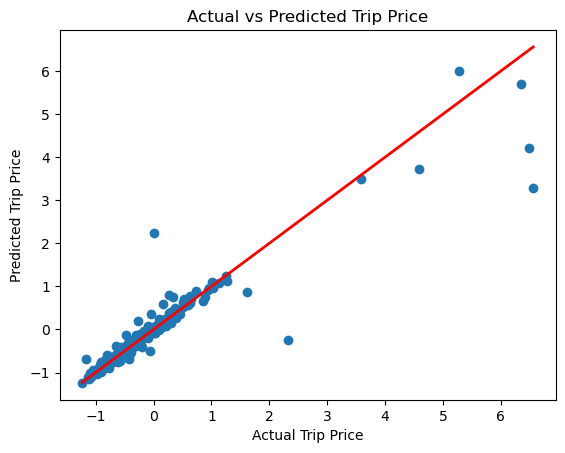

In [79]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Trip Price')
plt.ylabel('Predicted Trip Price')
plt.title('Actual vs Predicted Trip Price')
plt.show()


A **residual plot** helps you check if there is any pattern in the residuals (errors), which could suggest the need for a better model.

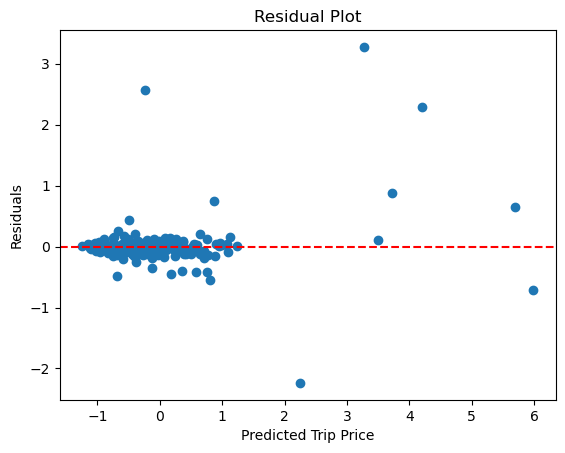

In [80]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Trip Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


**Learning Curve (For Overfitting/Underfitting Check)**
A learning curve shows how the model performance changes as the training size increases. It helps you detect overfitting or underfitting

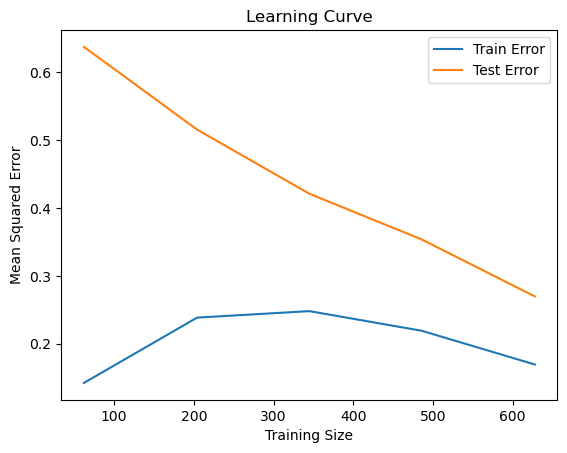

In [81]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(SVR(), X_train, y_train, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Train Error')
plt.plot(train_sizes, test_scores_mean, label='Test Error')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


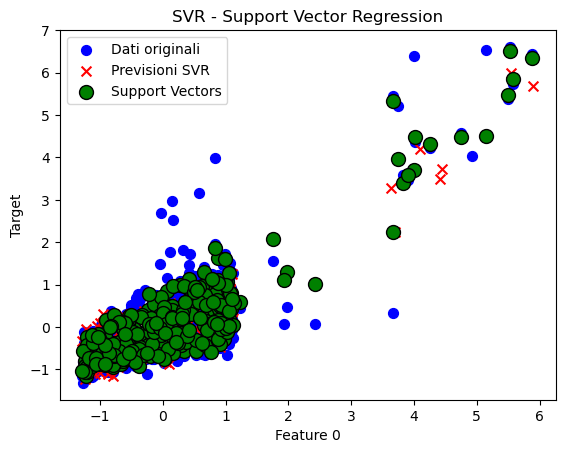

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
import pandas as pd

# Assumiamo che X_train, y_train siano già definiti
best_svm.fit(X_train, y_train)

# Estrai i support vectors
sv = best_svm.support_vectors_

# Predizioni sul test set
y_pred = best_svm.predict(X_test)


# Visualizza la previsione (usando X_train e y_train per i dati reali)
plt.scatter(X_train.iloc[:, 0], y_train, c='blue', label="Dati originali", s=50, marker='o')  # usa .iloc per accedere alle colonne
plt.scatter(X_test.iloc[:, 0], y_pred, c='red', label="Previsioni SVR", s=50, marker='x')

# Visualizza i support vectors (si assumono 2 caratteristiche per una visualizzazione 2D)
plt.scatter(sv[:, 0], best_svm.predict(sv), color='green', s=100, edgecolors='k', label="Support Vectors", marker='o')

plt.xlabel("Feature 0")
plt.ylabel("Target")
plt.title("SVR - Support Vector Regression")
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


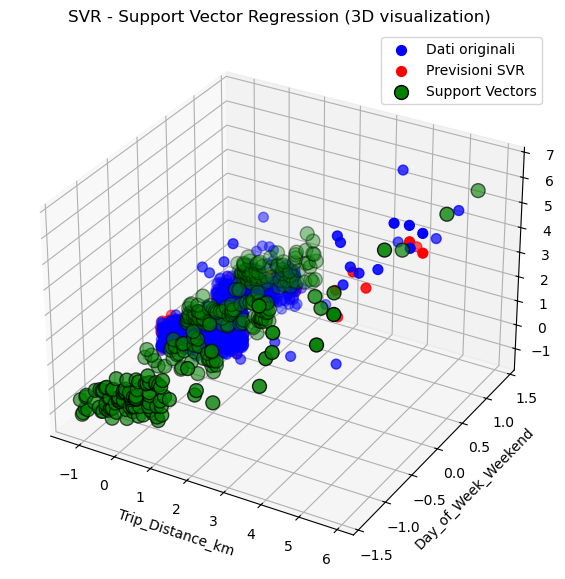

In [83]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# Crea il grafico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Nomi delle feature da visualizzare
feature_1 = 'Trip_Distance_km'  # Nome della colonna che rappresenta la prima feature
feature_2 = 'Day_of_Week_Weekend'  # Nome della colonna che rappresenta la seconda feature

# Scatter plot delle osservazioni originali (X_train e y_train)
ax.scatter(X_train[feature_1], X_train[feature_2], y_train, c='blue', label="Dati originali", s=50)

# Scatter plot delle previsioni (X_test e y_pred)
ax.scatter(X_test[feature_1], X_test[feature_2], y_pred, c='red', label="Previsioni SVR", s=50)

# Visualizza i support vectors
ax.scatter(sv[:, 0], sv[:, 1], best_svm.predict(sv), color='green', s=100, edgecolors='k', label="Support Vectors", marker='o')

# Etichette e titolo
ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel("Target/Trip Price")
ax.set_title("SVR - Support Vector Regression (3D visualization)")
ax.legend()

# Mostra il grafico
plt.show()


In [84]:
# Scatter plot delle osservazioni originali (X_train e y_train)
ax.scatter(X_train[feature_1], X_train[feature_2], y_train, c='blue', label="Dati originali", s=50)

# Scatter plot delle previsioni (X_test e y_pred)
ax.scatter(X_test[feature_1], X_test[feature_2], y_pred, c='red', label="Previsioni SVR", s=50)

# Visualizza i support vectors
ax.scatter(sv[:, 0], sv[:, 1], best_svm.predict(sv), color='green', s=100, edgecolors='k', label="Support Vectors", marker='o')

# Etichette e titolo
ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel("Target/Trip Price")
ax.set_title("SVR - Support Vector Regression (3D visualization)")
ax.legend()

# Mostra il grafico
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
